**import the necessary libraries**

In [88]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

**Load the dataset then split the features and the target**

In [89]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# on va convertir les valeurs continue en des valeurs discrétes
threshold = np.median(y)  # calculer la mediane de target
y = (y > threshold).astype(int)  # 1 si > threshold si non 0

**Display the 10 lines of the features and the targets**

In [90]:
print("\nThe first 10 lignes of X :")
print(X[:10])

print("\nThe 10 first lignes of y :")
print(y[:10])


The first 10 lignes of X :
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.017703

**Split the data into a train and test**

In [91]:
# 80% training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using the gaussian model and display the confusion matrix with the normalized and non normalized**

Précision globale : 0.72
Précision : 0.69
Confusion matrix, without normalization
[[37 12]
 [13 27]]
Normalized confusion matrix
[[0.75510204 0.24489796]
 [0.325      0.675     ]]


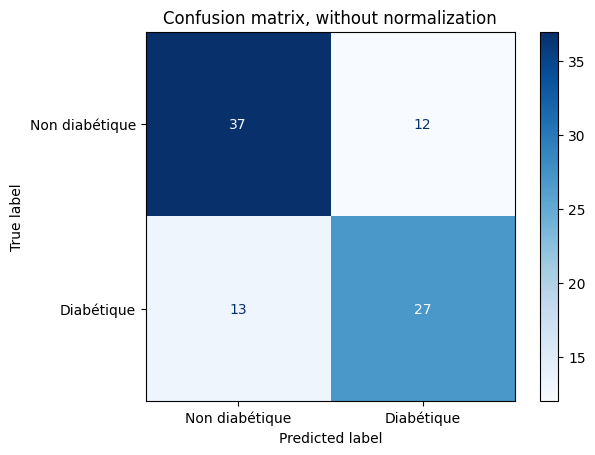

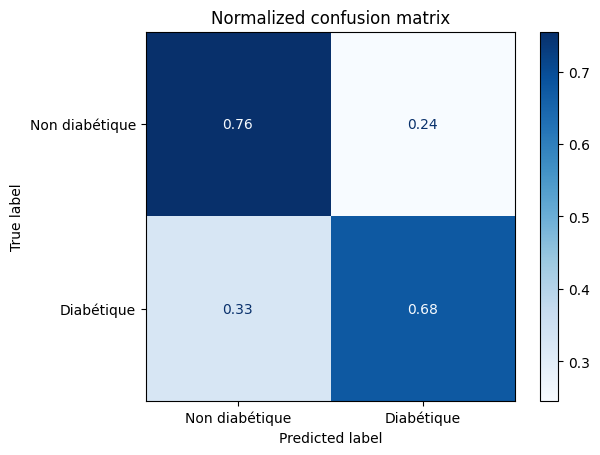

In [92]:
model = GaussianNB()

classifier = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Précision globale : {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Précision : {precision:.2f}")


class_names = ["Non diabétique", "Diabétique"]
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Show classification report for Gaussian model:**

In [93]:
target_names = ["Non diabétique", "Diabétique"]
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non diabétique       0.74      0.76      0.75        49
    Diabétique       0.69      0.68      0.68        40

      accuracy                           0.72        89
     macro avg       0.72      0.72      0.72        89
  weighted avg       0.72      0.72      0.72        89



**Use the SVM model and view its classification report**

In [94]:
model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision globale : {accuracy:.2f}")

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Précision globale : 0.75

Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        49
           1       0.74      0.70      0.72        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



**display the confusion matrix of the Gaussian model and the SVM model**

Matrice de confusion pour Naive Bayes :
 [[37 12]
 [13 27]]

Matrice de confusion pour SVM :
 [[39 10]
 [12 28]]


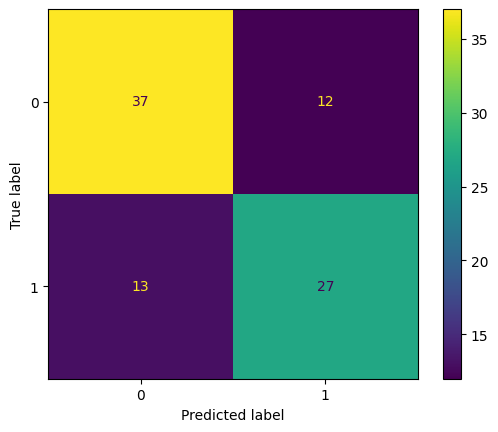

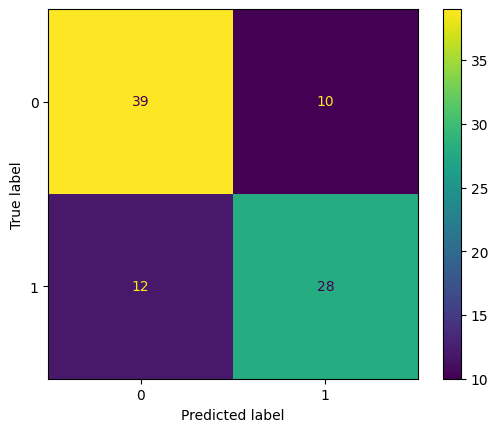

In [95]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


nb_cm = confusion_matrix(y_test, nb_predictions)
print("Matrice de confusion pour Naive Bayes :\n", nb_cm)
ConfusionMatrixDisplay(confusion_matrix=nb_cm).plot()


svm_cm = confusion_matrix(y_test, svm_predictions)
print("\nMatrice de confusion pour SVM :\n", svm_cm)
ConfusionMatrixDisplay(confusion_matrix=svm_cm).plot()

**Using the logistic regression model, display the classification report and confusion matrix**

Précision globale (Logistic Regression) : 0.74

Rapport de classification (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.71      0.72      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



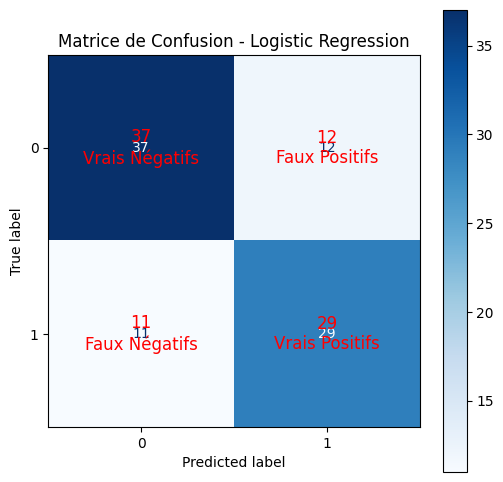

In [96]:
# Initialisation du modèle de régression logistique
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Entraînement du modèle sur le jeu d'entraînement
log_reg_model.fit(X_train, y_train)

# Prédiction sur le jeu de test
log_reg_predictions = log_reg_model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Précision globale (Logistic Regression) : {accuracy:.2f}")

print("\nRapport de classification (Logistic Regression) :")
print(classification_report(y_test, log_reg_predictions))

# Matrice de confusion
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)

# Affichage de la matrice de confusion annotée
def plot_confusion_matrix_with_annotations(cm, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax, colorbar=True)

    # Ajouter des annotations
    labels = ["Vrais Négatifs", "Faux Positifs", "Faux Négatifs", "Vrais Positifs"]
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annotation = f"{cm[i, j]}\n{labels[i * cm.shape[1] + j]}"
            plt.text(j, i, annotation, ha="center", va="center", color="red", fontsize=12)

    plt.title(title)
    plt.show()

plot_confusion_matrix_with_annotations(log_reg_cm, "Matrice de Confusion - Logistic Regression")

**display the classification report of different models**

In [98]:
# Précisions globales
nb_accuracy = accuracy_score(y_test, nb_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Rapports de classification
nb_report = classification_report(y_test, nb_predictions, output_dict=True)
svm_report = classification_report(y_test, svm_predictions, output_dict=True)
log_reg_report = classification_report(y_test, log_reg_predictions, output_dict=True)

# Organisation des résultats
results = pd.DataFrame({
    "Modèle": ["Naive Bayes", "SVM", "Régression Logistique"],
    "Précision Globale": [nb_accuracy, svm_accuracy, log_reg_accuracy],
    "Précision (Classe 0)": [nb_report['0']['precision'], svm_report['0']['precision'], log_reg_report['0']['precision']],
    "Précision (Classe 1)": [nb_report['1']['precision'], svm_report['1']['precision'], log_reg_report['1']['precision']],
    "Rappel (Classe 0)": [nb_report['0']['recall'], svm_report['0']['recall'], log_reg_report['0']['recall']],
    "Rappel (Classe 1)": [nb_report['1']['recall'], svm_report['1']['recall'], log_reg_report['1']['recall']],
    "F1-Score (Classe 0)": [nb_report['0']['f1-score'], svm_report['0']['f1-score'], log_reg_report['0']['f1-score']],
    "F1-Score (Classe 1)": [nb_report['1']['f1-score'], svm_report['1']['f1-score'], log_reg_report['1']['f1-score']],
})

# Affichage des résultats
print("Comparaison des modèles :")
print(results)

# Affichage des matrices de confusion
print("\nMatrice de Confusion - Naive Bayes :\n", confusion_matrix(y_test, nb_predictions))
print("\nMatrice de Confusion - SVM :\n", confusion_matrix(y_test, svm_predictions))
print("\nMatrice de Confusion - Régression Logistique :\n", confusion_matrix(y_test, log_reg_predictions))


Comparaison des modèles :
                  Modèle  Précision Globale  Précision (Classe 0)  \
0            Naive Bayes           0.719101              0.740000   
1                    SVM           0.752809              0.764706   
2  Régression Logistique           0.741573              0.770833   

   Précision (Classe 1)  Rappel (Classe 0)  Rappel (Classe 1)  \
0              0.692308           0.755102              0.675   
1              0.736842           0.795918              0.700   
2              0.707317           0.755102              0.725   

   F1-Score (Classe 0)  F1-Score (Classe 1)  
0             0.747475             0.683544  
1             0.780000             0.717949  
2             0.762887             0.716049  

Matrice de Confusion - Naive Bayes :
 [[37 12]
 [13 27]]

Matrice de Confusion - SVM :
 [[39 10]
 [12 28]]

Matrice de Confusion - Régression Logistique :
 [[37 12]
 [11 29]]


**display of accuracy and error of different models**

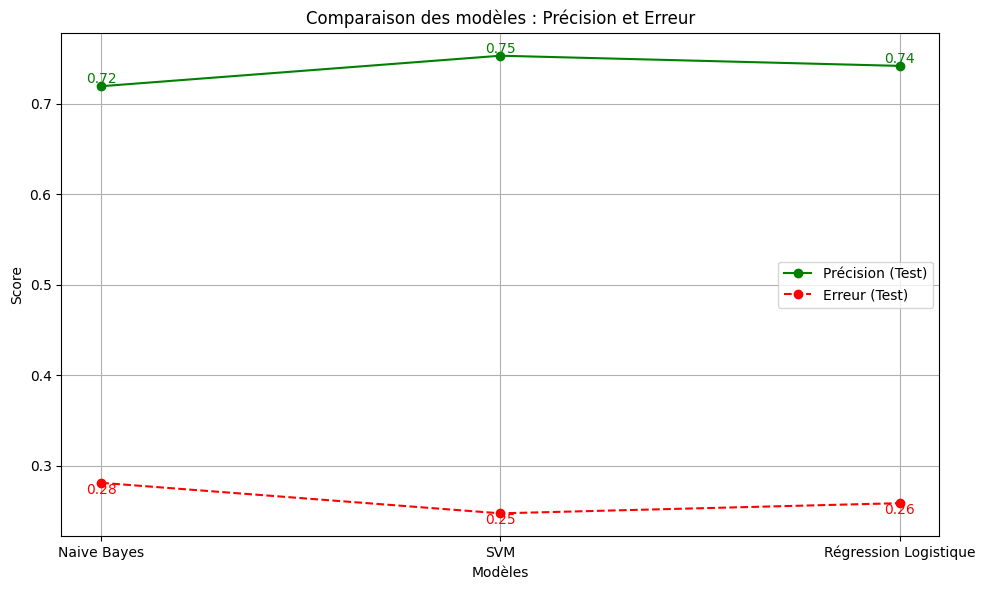

In [99]:
# Précision et erreur pour chaque modèle
#train_accuracies = [nb_accuracy, svm_accuracy, log_reg_accuracy]  # Remplacez par vos précisions sur train
test_accuracies = [nb_accuracy, svm_accuracy, log_reg_accuracy]   # Précisions sur test
test_errors = [1 - acc for acc in test_accuracies]  # Erreurs sur test

# Noms des modèles
models = ["Naive Bayes", "SVM", "Régression Logistique"]

# Tracer les courbes
plt.figure(figsize=(10, 6))

# Courbes de précision
plt.plot(models, test_accuracies, marker='o', label="Précision (Test)", color='green', linestyle='-')

# Courbes d'erreur
plt.plot(models, test_errors, marker='o', label="Erreur (Test)", color='red', linestyle='--')

# Ajouter des annotations
for i, model in enumerate(models):
    plt.text(model, test_accuracies[i], f'{test_accuracies[i]:.2f}', fontsize=10, ha='center', va='bottom', color='green')
    plt.text(model, test_errors[i], f'{test_errors[i]:.2f}', fontsize=10, ha='center', va='top', color='red')

# Personnalisation du graphique
plt.title("Comparaison des modèles : Précision et Erreur")
plt.xlabel("Modèles")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Affichage
plt.show()

**Choose different models and measure the accuracy of each based on the size of the train**

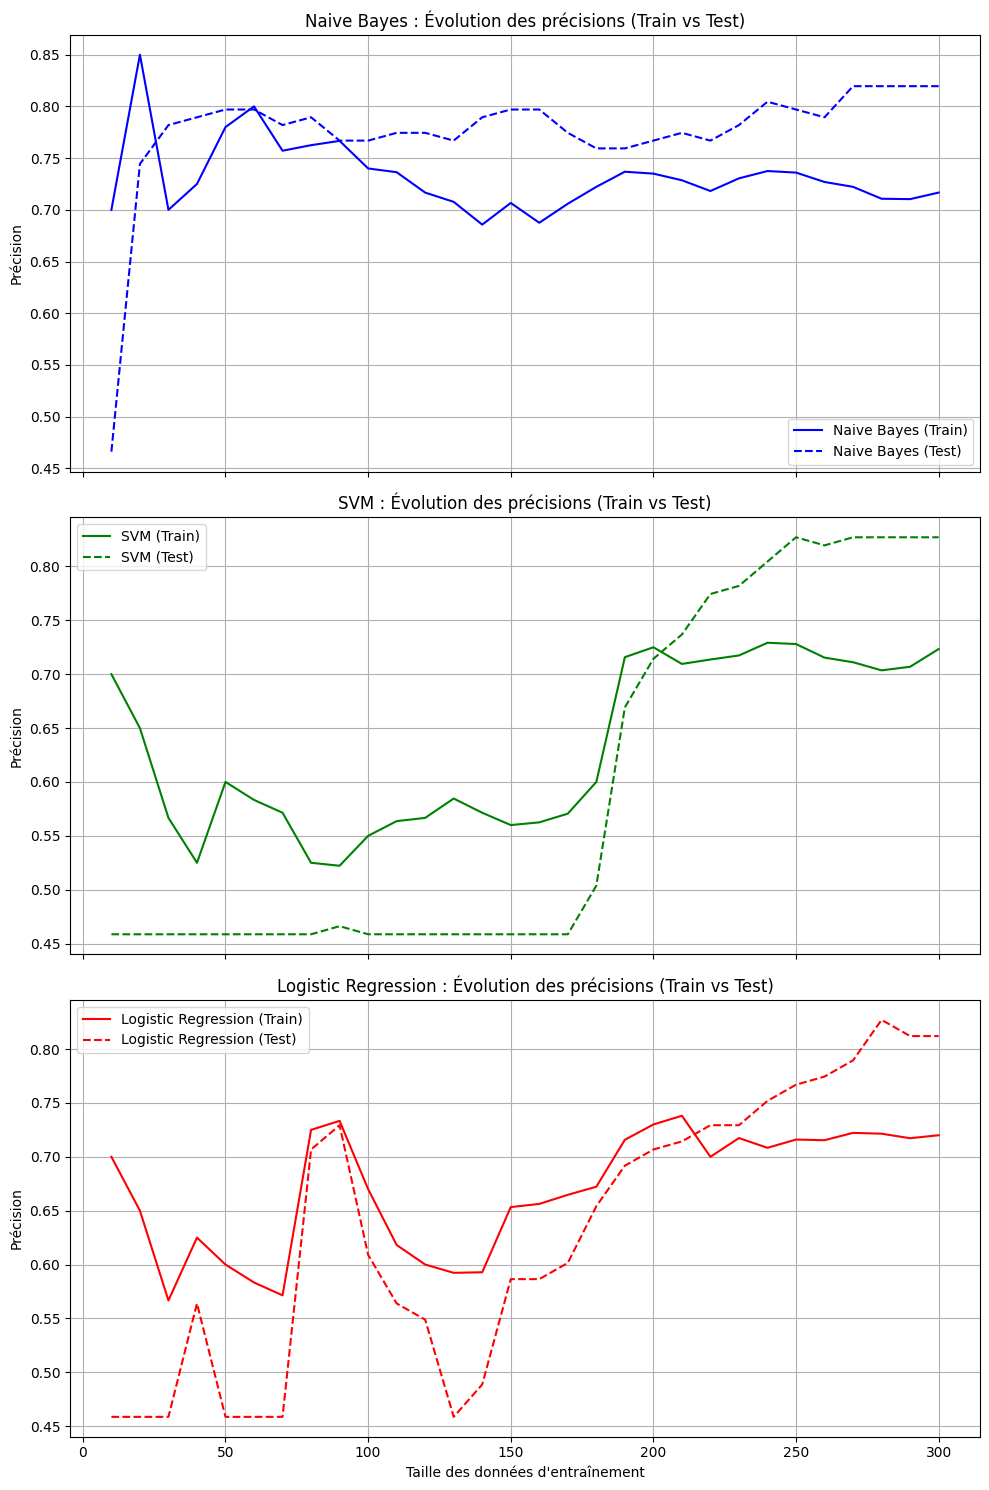

In [100]:
# Diviser les données en ensembles de train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Listes pour stocker les résultats
nb_train_acc = []
nb_test_acc = []
svm_train_acc = []
svm_test_acc = []
lr_train_acc = []
lr_test_acc = []

# Tailles croissantes pour l'entraînement progressif
train_sizes = range(10, len(X_train), 10)

# Modèles
nb_model = GaussianNB()
svm_model = SVC(kernel="linear", random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

for size in train_sizes:
    # Sous-ensemble des données d'entraînement
    X_sub_train = X_train[:size]
    y_sub_train = y_train[:size]

    # Naive Bayes
    nb_model.fit(X_sub_train, y_sub_train)
    nb_train_acc.append(accuracy_score(y_sub_train, nb_model.predict(X_sub_train)))
    nb_test_acc.append(accuracy_score(y_test, nb_model.predict(X_test)))

    # SVM
    svm_model.fit(X_sub_train, y_sub_train)
    svm_train_acc.append(accuracy_score(y_sub_train, svm_model.predict(X_sub_train)))
    svm_test_acc.append(accuracy_score(y_test, svm_model.predict(X_test)))

    # Logistic Regression
    lr_model.fit(X_sub_train, y_sub_train)
    lr_train_acc.append(accuracy_score(y_sub_train, lr_model.predict(X_sub_train)))
    lr_test_acc.append(accuracy_score(y_test, lr_model.predict(X_test)))

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Tracer Naive Bayes
axes[0].plot(train_sizes, nb_train_acc, label="Naive Bayes (Train)", color='blue', linestyle='-')
axes[0].plot(train_sizes, nb_test_acc, label="Naive Bayes (Test)", color='blue', linestyle='--')
axes[0].set_title("Naive Bayes : Évolution des précisions (Train vs Test)")
axes[0].set_ylabel("Précision")
axes[0].legend()
axes[0].grid(True)

# Tracer SVM
axes[1].plot(train_sizes, svm_train_acc, label="SVM (Train)", color='green', linestyle='-')
axes[1].plot(train_sizes, svm_test_acc, label="SVM (Test)", color='green', linestyle='--')
axes[1].set_title("SVM : Évolution des précisions (Train vs Test)")
axes[1].set_ylabel("Précision")
axes[1].legend()
axes[1].grid(True)

# Tracer Logistic Regression
axes[2].plot(train_sizes, lr_train_acc, label="Logistic Regression (Train)", color='red', linestyle='-')
axes[2].plot(train_sizes, lr_test_acc, label="Logistic Regression (Test)", color='red', linestyle='--')
axes[2].set_title("Logistic Regression : Évolution des précisions (Train vs Test)")
axes[2].set_xlabel("Taille des données d'entraînement")
axes[2].set_ylabel("Précision")
axes[2].legend()
axes[2].grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

**display the confusion matrix of the different models**

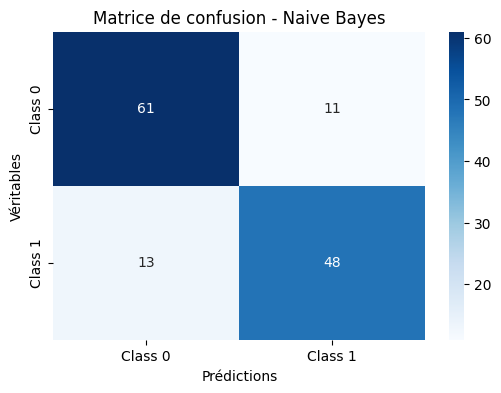

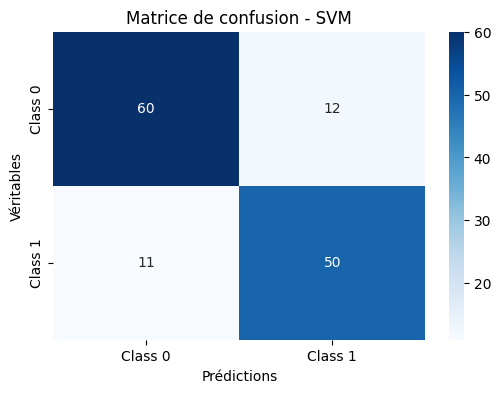

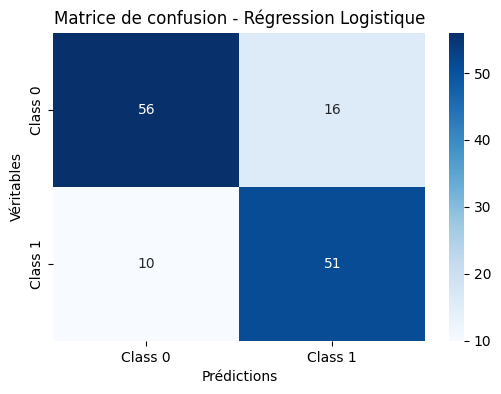

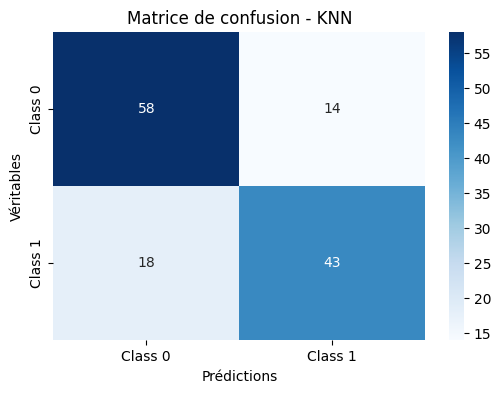

In [101]:
# Diviser les données en ensembles de train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèles
nb_model = GaussianNB()
svm_model = SVC(kernel="linear", random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=50)

# Entraîner les modèles
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Calcul des matrices de confusion
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Fonction pour afficher les matrices de confusion
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel('Prédictions')
    plt.ylabel('Véritables')
    plt.show()

# Afficher les matrices de confusion pour chaque modèle
plot_confusion_matrix(cm_nb, "Naive Bayes")
plot_confusion_matrix(cm_svm, "SVM")
plot_confusion_matrix(cm_lr, "Régression Logistique")
plot_confusion_matrix(cm_knn, "KNN")


**display the classification report of each model**

In [102]:
# Classification report pour chaque modèle
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svm))

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        72
           1       0.81      0.79      0.80        61

    accuracy                           0.82       133
   macro avg       0.82      0.82      0.82       133
weighted avg       0.82      0.82      0.82       133

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        72
           1       0.81      0.82      0.81        61

    accuracy                           0.83       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.83      0.83      0.83       133

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        72
           1       0.76      0.84      0.80        61

    accuracy                           0.80       133
   macro avg       0

**Apply the k fold to the knn model and then measure the best k we can get**

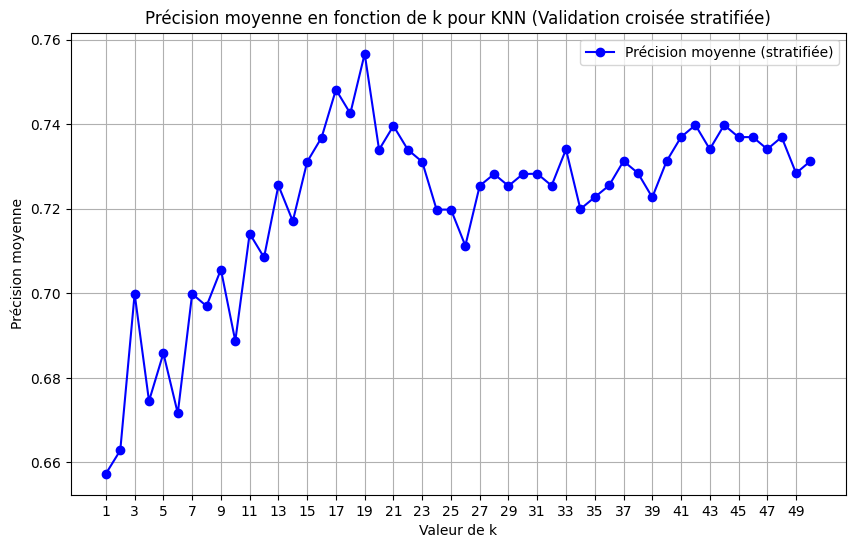

La meilleure valeur de k (validation croisée stratifiée) est : 19


In [103]:
# Assurez-vous que X et y sont des numpy.ndarray
X = np.array(X)
y = np.array(y)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour effectuer la validation croisée stratifiée
def stratified_cross_validation(model, X_train, y_train, k_folds=5):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    scores = []

    for train_index, valid_index in skf.split(X_train, y_train):
        # Convertir les indices en sous-ensembles
        X_train_fold, X_valid = X_train[train_index], X_train[valid_index]
        y_train_fold, y_valid = y_train[train_index], y_train[valid_index]

        # Entraîner le modèle
        model.fit(X_train_fold, y_train_fold)

        # Prédictions et évaluation
        predictions = model.predict(X_valid)
        accuracy = np.mean(predictions == y_valid)
        scores.append(accuracy)

    return np.mean(scores)

# Liste pour stocker les résultats de chaque k
k_values = range(1, 51)
stratified_scores = []

# Effectuer la validation croisée stratifiée pour chaque k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = stratified_cross_validation(knn_model, X_train, y_train, k_folds=5)
    stratified_scores.append(score)

# Tracer les scores pour chaque k
plt.figure(figsize=(10, 6))
plt.plot(k_values, stratified_scores, marker='o', color='blue', linestyle='-', label='Précision moyenne (stratifiée)')
plt.title('Précision moyenne en fonction de k pour KNN (Validation croisée stratifiée)')
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

# Trouver la meilleure valeur de k
best_k_stratified = k_values[np.argmax(stratified_scores)]
print(f"La meilleure valeur de k (validation croisée stratifiée) est : {best_k_stratified}")

**display the accuracy of each model based on the division size**


*** Partitionnement avec test_size=0.2 ***

Modèle : Naive Bayes
Précision : 0.81
Matrice de confusion :
[[77 12]
 [26 85]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        89
           1       0.88      0.77      0.82       111

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200

Modèle : SVM
Précision : 0.83
Matrice de confusion :
[[76 13]
 [21 90]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        89
           1       0.87      0.81      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Modèle : Logistic Regression
Précision : 0.83
Matrice de confusion :
[[75 14]
 [20 91]]
Rappo

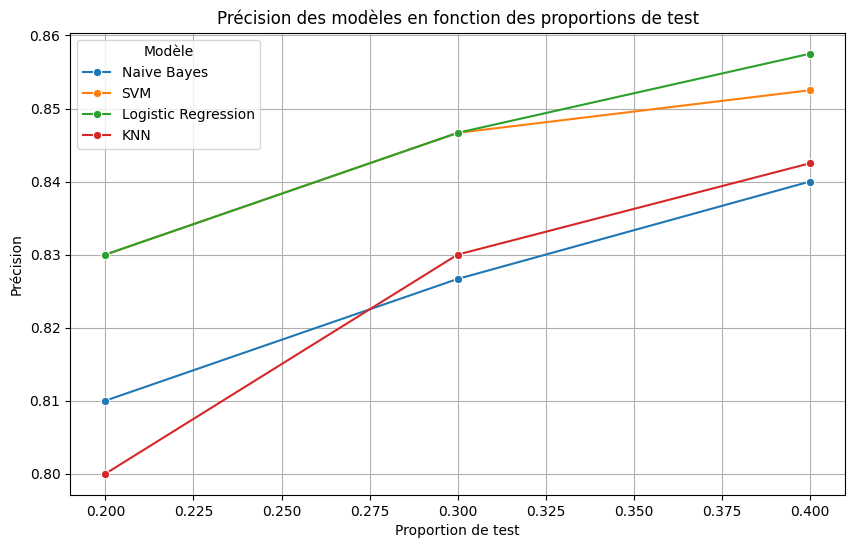

In [104]:
# Spécifiez le chemin du fichier CSV
file_path = r"/content/diabetes.csv"

# Lire le fichier CSV
df = pd.read_csv(file_path)

# Exemple : Générer des données fictives
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Différentes proportions de partitionnement
splits = [0.2, 0.3, 0.4]

# Modèles à tester
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel="linear", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Résultats pour chaque partitionnement
results = []

for split in splits:
    print(f"\n*** Partitionnement avec test_size={split} ***\n")

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    for model_name, model in models.items():
        # Entraîner le modèle
        model.fit(X_train, y_train)

        # Prédictions
        y_pred = model.predict(X_test)

        # Évaluer les performances
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Afficher les résultats
        print(f"Modèle : {model_name}")
        print(f"Précision : {accuracy:.2f}")
        print(f"Matrice de confusion :\n{cm}")
        print(f"Rapport de classification :\n{report}")

        # Stocker les résultats
        results.append({
            "Partition": split,
            "Modèle": model_name,
            "Précision": accuracy
        })

# Résultats sous forme de DataFrame
results_df = pd.DataFrame(results)

# Tracer les performances des modèles en fonction des proportions de test
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="Partition", y="Précision", hue="Modèle", marker="o")
plt.title("Précision des modèles en fonction des proportions de test")
plt.xlabel("Proportion de test")
plt.ylabel("Précision")
plt.legend(title="Modèle")
plt.grid(True)
plt.show()

In [105]:
'''Notes:
Les résultats des trois configurations de partitionnement montrent une progression intéressante des performances des modèles
en fonction de la taille de l’ensemble de test. Globalement, les modèles SVM et régression logistique se distinguent
comme les meilleurs en termes de précision, atteignant jusqu'à 86 % avec une partition de test_size=0.4.
Cette partition semble optimale, car elle maintient un équilibre entre la taille des ensembles d'entraînement et de test,
permettant ainsi une meilleure généralisation sans sacrifier la quantité de données pour l'entraînement.

La régression logistique montre une légère supériorité dans cette configuration, avec un f1-score élevé pour les deux
classes (0.85 pour la classe 0 et 0.86 pour la classe 1), suggérant un modèle robuste capable de bien capturer les
relations entre les variables. La précision constante et le bon rappel confirment qu’elle offre une prédiction fiable,
tant pour les classes positives que négatives, ce qui en fait le choix préféré pour ce jeu de données.'''

"Notes:\nLes résultats des trois configurations de partitionnement montrent une progression intéressante des performances des modèles\nen fonction de la taille de l’ensemble de test. Globalement, les modèles SVM et régression logistique se distinguent\ncomme les meilleurs en termes de précision, atteignant jusqu'à 86 % avec une partition de test_size=0.4.\nCette partition semble optimale, car elle maintient un équilibre entre la taille des ensembles d'entraînement et de test,\npermettant ainsi une meilleure généralisation sans sacrifier la quantité de données pour l'entraînement.\n\nLa régression logistique montre une légère supériorité dans cette configuration, avec un f1-score élevé pour les deux\nclasses (0.85 pour la classe 0 et 0.86 pour la classe 1), suggérant un modèle robuste capable de bien capturer les\nrelations entre les variables. La précision constante et le bon rappel confirment qu’elle offre une prédiction fiable,\ntant pour les classes positives que négatives, ce qui e

**display the performance of the knn model based on the k value**

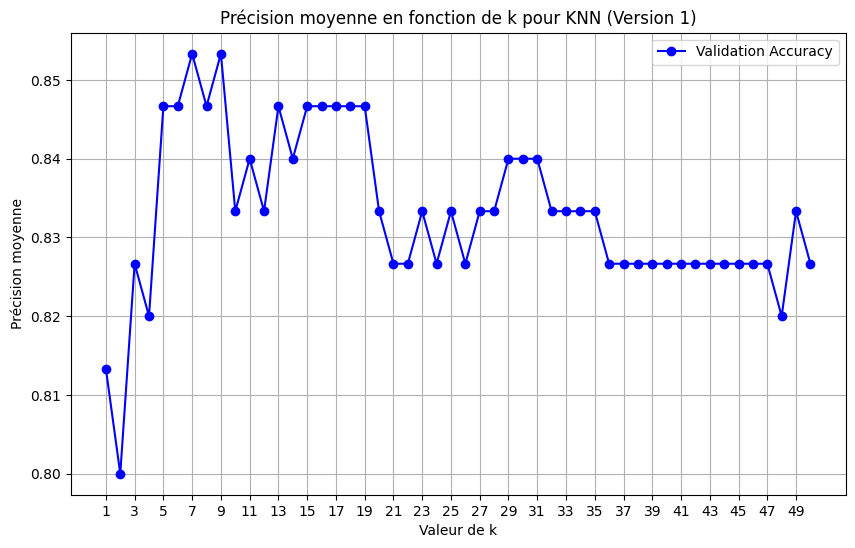

Version 1 : Meilleure valeur de k = 7 avec une précision de 0.85


In [106]:
# Division des données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Diviser les 30% de test en 50% validation et 50% test
X_valid, X_test_final, y_valid, y_test_final = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Fonction pour entraîner et évaluer avec validation
def train_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    accuracy = np.mean(predictions == y_valid)
    return accuracy

# Liste pour stocker les résultats pour chaque k
k_values = range(1, 51)
validation_scores = []

# Tester chaque valeur de k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = train_and_evaluate(knn_model, X_train, y_train, X_valid, y_valid)
    validation_scores.append(score)

# Trouver la meilleure valeur de k
best_k_v1 = k_values[np.argmax(validation_scores)]
best_accuracy_v1 = max(validation_scores)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_scores, marker='o', color='blue', linestyle='-', label='Validation Accuracy')
plt.title('Précision moyenne en fonction de k pour KNN (Version 1)')
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

print(f"Version 1 : Meilleure valeur de k = {best_k_v1} avec une précision de {best_accuracy_v1:.2f}")

**display the performance of the knn model based on the k value v2**

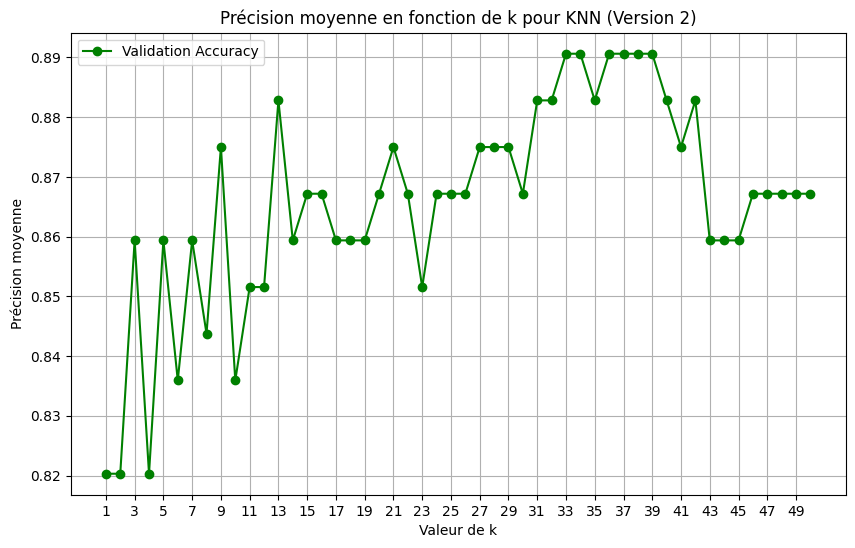

Version 2 : Meilleure valeur de k = 33 avec une précision de 0.89


In [107]:
# Division des données en ensembles d'entraînement (85%) et de test (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Diviser les 85% d'entraînement en 85% train et 15% validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)

# Liste pour stocker les résultats pour chaque k
validation_scores_v2 = []

# Tester chaque valeur de k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = train_and_evaluate(knn_model, X_train, y_train, X_valid, y_valid)
    validation_scores_v2.append(score)

# Trouver la meilleure valeur de k
best_k_v2 = k_values[np.argmax(validation_scores_v2)]
best_accuracy_v2 = max(validation_scores_v2)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_scores_v2, marker='o', color='green', linestyle='-', label='Validation Accuracy')
plt.title('Précision moyenne en fonction de k pour KNN (Version 2)')
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

print(f"Version 2 : Meilleure valeur de k = {best_k_v2} avec une précision de {best_accuracy_v2:.2f}")


In [108]:
'''Notes:
Explication des approches :
Version 1 (70% Train, 30% Test avec 50% Validation) :
Cette méthode divise le dataset initial en 70% pour l'entraînement et 30% pour le test. Les 30% du test sont ensuite divisés à parts égales pour validation et test final. Cela permet de tester les modèles sur des données qu'ils n'ont jamais vues, en utilisant une partie comme validation pour ajuster k.

Version 2 (85% Train, 15% Test avec 15% Validation) :
Cette méthode alloue une proportion plus importante (85%) pour l'entraînement initial et une validation interne (15%) pour optimiser le paramètre k. Le reste (15%) sert à tester la performance finale.

+ La meilleure valeur de k dépend du dataset et de la répartition des données.
- Version 1 est mieux adaptée aux datasets où les échantillons sont limités, car elle réserve une partie plus importante pour l'évaluation.
- Version 2 est utile si vous souhaitez maximiser l'entraînement tout en conservant un ensemble de validation significatif.

--->Les deux approches de validation manuelle pour le choix de la meilleure valeur de 𝑘
k dans le classifieur KNN présentent des avantages et des limitations distincts.
Dans la version 1 (70 % entraînement, 30 % test, avec 50 % validation),
une plus grande proportion des données est réservée pour l'évaluation (validation et test),
ce qui permet de mieux estimer la capacité généralisante du modèle sur des données non vues.
Cependant, cela réduit la quantité de données disponibles pour l'entraînement, ce qui peut limiter la performance du
modèle lorsque les données sont limitées. Dans la version 2 (85 % entraînement, 15 % test, avec 15 % validation),
une plus grande partie des données est utilisée pour l'entraînement, ce qui est bénéfique pour capturer des patterns
complexes dans des datasets plus petits. Cependant, la réduction de la taille des ensembles de validation et de test
peut entraîner une estimation moins précise des performances. En pratique, le choix entre ces deux approches dépend de
la taille et de la distribution des données disponibles, ainsi que des priorités entre maximiser l'entraînement et obtenir
une évaluation robuste.

'''

"Notes:\nExplication des approches :\nVersion 1 (70% Train, 30% Test avec 50% Validation) :\nCette méthode divise le dataset initial en 70% pour l'entraînement et 30% pour le test. Les 30% du test sont ensuite divisés à parts égales pour validation et test final. Cela permet de tester les modèles sur des données qu'ils n'ont jamais vues, en utilisant une partie comme validation pour ajuster k.\n\nVersion 2 (85% Train, 15% Test avec 15% Validation) :\nCette méthode alloue une proportion plus importante (85%) pour l'entraînement initial et une validation interne (15%) pour optimiser le paramètre k. Le reste (15%) sert à tester la performance finale.\n\n+ La meilleure valeur de k dépend du dataset et de la répartition des données.\n- Version 1 est mieux adaptée aux datasets où les échantillons sont limités, car elle réserve une partie plus importante pour l'évaluation.\n- Version 2 est utile si vous souhaitez maximiser l'entraînement tout en conservant un ensemble de validation significat

**Display the precision of the KNN model based on the mean value of the precisions and the value of the k**

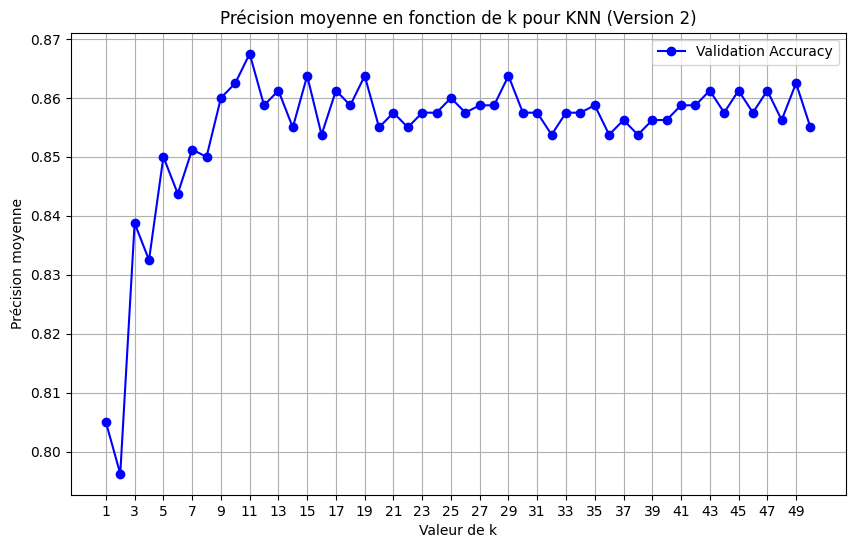

Version 2 : Meilleure valeur de k = 11 avec une précision de 0.87


In [109]:
# Division des données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser les 30% de test en 50% validation et 50% test
X_valid, X_test_final, y_valid, y_test_final = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# Fonction pour évaluer avec k-fold cross-validation
def evaluate_with_kfold(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds)
    scores = []
    for train_index, valid_index in kf.split(X):
        X_train_fold, X_valid_fold = X[train_index], X[valid_index]
        y_train_fold, y_valid_fold = y[train_index], y[valid_index]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_valid_fold)
        accuracy = np.mean(predictions == y_valid_fold)
        scores.append(accuracy)
    return np.mean(scores)

# Liste pour stocker les résultats pour chaque k
k_values = range(1, 51)
validation_scores = []

# Tester chaque valeur de k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = evaluate_with_kfold(knn_model, X_train, y_train, k_folds=5)
    validation_scores.append(score)

# Trouver la meilleure valeur de k
best_k_v2 = k_values[np.argmax(validation_scores)]
best_accuracy_v2 = max(validation_scores)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_scores, marker='o', color='blue', linestyle='-', label='Validation Accuracy')
plt.title('Précision moyenne en fonction de k pour KNN (Version 2)')
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

print(f"Version 2 : Meilleure valeur de k = {best_k_v2} avec une précision de {best_accuracy_v2:.2f}")

**Display the precision of the KNN model based on the mean value of the precisions and the value of the k (version2)**

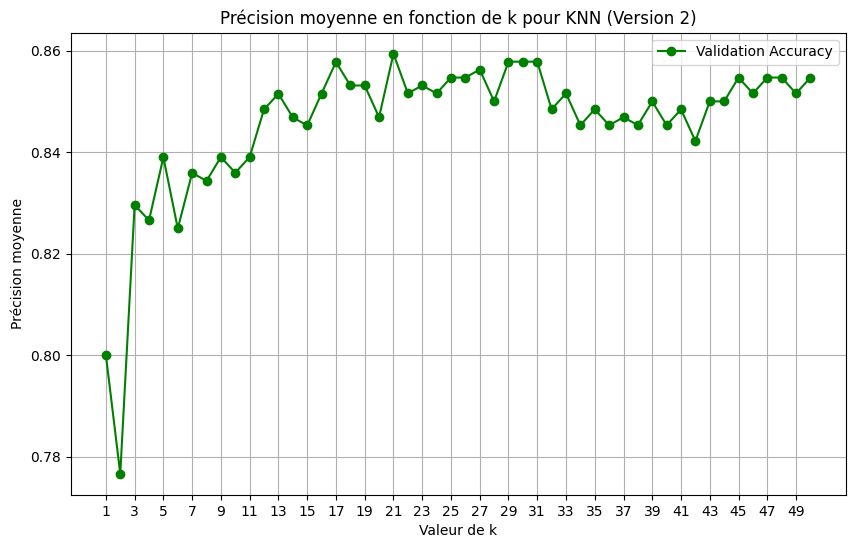

Version 2 : Meilleure valeur de k = 21 avec une précision de 0.86


In [110]:
# Division des données en ensembles d'entraînement (85%) et de test (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser les 85% d'entraînement en 85% train et 15% validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=50)

# Fonction pour évaluer avec k-fold cross-validation
def evaluate_with_kfold(model, X, y, k_folds=9):
    kf = KFold(n_splits=k_folds)
    scores = []
    for train_index, valid_index in kf.split(X):
        X_train_fold, X_valid_fold = X[train_index], X[valid_index]
        y_train_fold, y_valid_fold = y[train_index], y[valid_index]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_valid_fold)
        accuracy = np.mean(predictions == y_valid_fold)
        scores.append(accuracy)
    return np.mean(scores)

# Liste pour stocker les résultats pour chaque k
validation_scores_v2 = []

# Tester chaque valeur de k
k_values = range(1, 51)  # Assurez-vous que k_values est défini
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = evaluate_with_kfold(knn_model, X_train, y_train, k_folds=9)
    validation_scores_v2.append(score)

# Trouver la meilleure valeur de k
best_k_v2 = k_values[np.argmax(validation_scores_v2)]
best_accuracy_v2 = max(validation_scores_v2)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_scores_v2, marker='o', color='green', linestyle='-', label='Validation Accuracy')
plt.title('Précision moyenne en fonction de k pour KNN (Version 2)')
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

print(f"Version 2 : Meilleure valeur de k = {best_k_v2} avec une précision de {best_accuracy_v2:.2f}")

**Display the precision of the KNN model based on the mean value of the precisions and the value of the k (version3)**

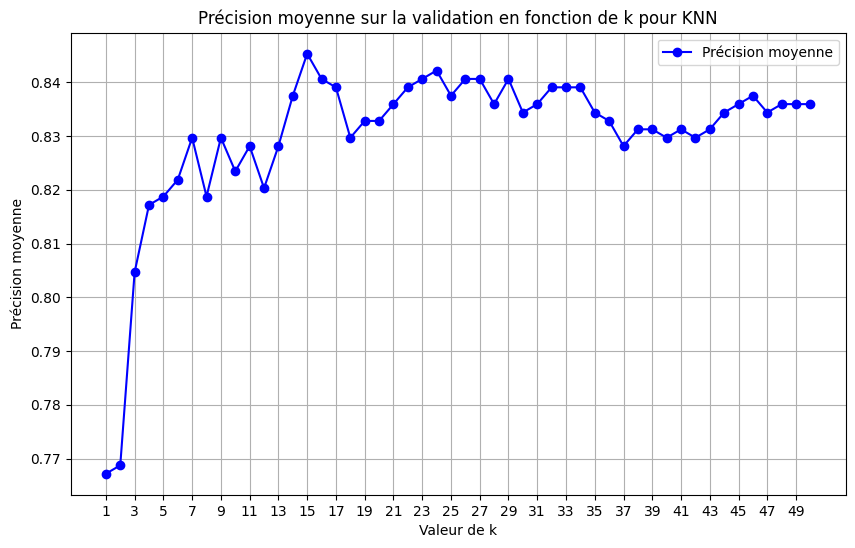

Précision moyenne maximale sur la validation : 0.85
La meilleure valeur de k est : 15
Précision sur l'ensemble de test avec k=15 : 0.86


In [111]:
# Diviser les données en train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Diviser le train en train final
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Liste pour stocker les précisions moyennes pour chaque k
k_values = range(1, 51)
val_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Utiliser cross_val_score directement avec les données de train final
    scores = cross_val_score(knn_model, X_train_final, y_train_final, cv=5, scoring='accuracy')
    val_accuracies.append(np.mean(scores))

# Tracer les précisions pour chaque k
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, marker='o', color='blue', linestyle='-', label='Précision moyenne')
plt.title("Précision moyenne sur la validation en fonction de k pour KNN")
plt.xlabel("Valeur de k")
plt.ylabel("Précision moyenne")
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

# Identifier le meilleur k
best_k = k_values[np.argmax(val_accuracies)]
print(f"Précision moyenne maximale sur la validation : {max(val_accuracies):.2f}")
print(f"La meilleure valeur de k est : {best_k}")

# Entraîner le modèle avec le meilleur k sur l'ensemble d'entraînement final
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train_final, y_train_final)

# Tester sur l'ensemble de test
test_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))
print(f"Précision sur l'ensemble de test avec k={best_k} : {test_accuracy:.2f}")

**Display the precision of the KNN model based on the mean value of the precisions and the value of the k using the validation curve**

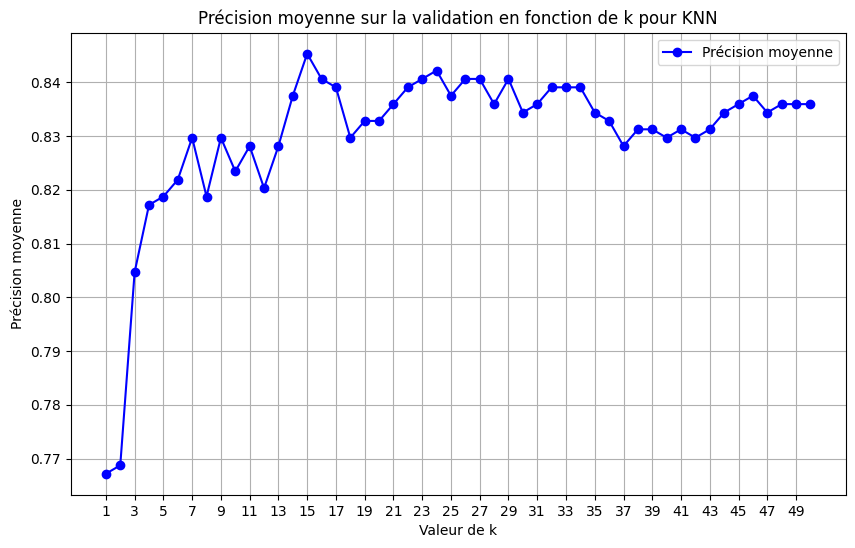

Précision moyenne maximale sur la validation : 0.85
La meilleure valeur de k est : 15
Précision sur l'ensemble de test avec k=15 : 0.86


In [112]:
# Diviser les données en train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Diviser le train en train final
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Liste pour stocker les valeurs de k
k_values = range(1, 51)

# Utiliser validation_curve pour obtenir les précisions
train_accuracies, val_accuracies = validation_curve(
    KNeighborsClassifier(),
    X_train_final,
    y_train_final,
    param_name='n_neighbors',
    param_range=k_values,
    scoring='accuracy',
    cv=5
)

# Calculer la précision moyenne pour chaque k
mean_val_accuracies = np.mean(val_accuracies, axis=1)

# Tracer les précisions pour chaque k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_val_accuracies, marker='o', color='blue', linestyle='-', label='Précision moyenne')
plt.title("Précision moyenne sur la validation en fonction de k pour KNN")
plt.xlabel("Valeur de k")
plt.ylabel("Précision moyenne")
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

# Identifier le meilleur k
best_k = k_values[np.argmax(mean_val_accuracies)]
print(f"Précision moyenne maximale sur la validation : {max(mean_val_accuracies):.2f}")
print(f"La meilleure valeur de k est : {best_k}")

# Entraîner le modèle avec le meilleur k sur l'ensemble d'entraînement final
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train_final, y_train_final)

# Tester sur l'ensemble de test
test_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))
print(f"Précision sur l'ensemble de test avec k={best_k} : {test_accuracy:.2f}")

**Using the grid search to search the best disnace and the k value**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 238, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-pack

Meilleur k : 23
Meilleure métrique : manhattan
Précision sur l'ensemble de test avec k=23 et métrique=manhattan : 0.85


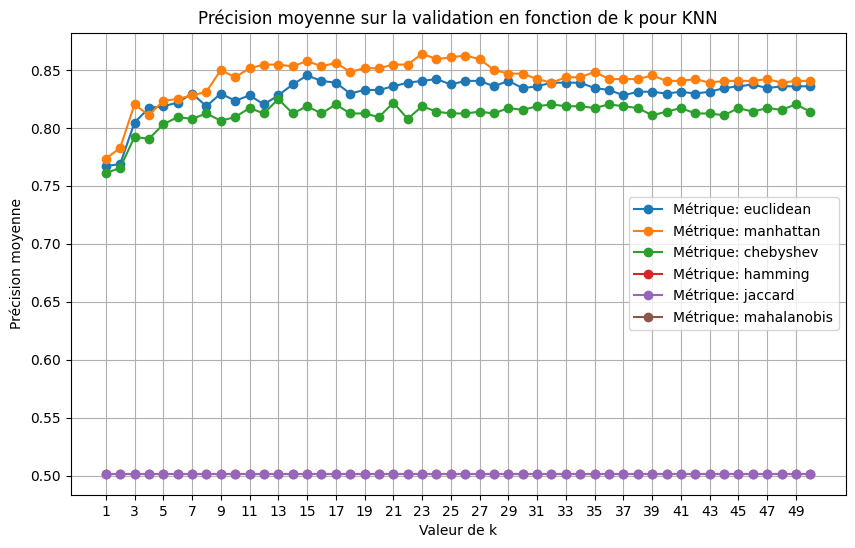

In [113]:
# Diviser les données en train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Diviser le train en train final
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Définir les paramètres pour GridSearchCV
param_grid = {
    'n_neighbors': range(1, 51),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming', 'jaccard', 'mahalanobis']
}

# Créer le modèle KNN
knn = KNeighborsClassifier()

# Configurer GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_final, y_train_final)

# Meilleurs paramètres
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_metric = best_params['metric']

print(f"Meilleur k : {best_k}")
print(f"Meilleure métrique : {best_metric}")

# Entraîner le modèle avec les meilleurs paramètres
knn_best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best_model.fit(X_train_final, y_train_final)

# Tester sur l'ensemble de test
test_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))
print(f"Précision sur l'ensemble de test avec k={best_k} et métrique={best_metric} : {test_accuracy:.2f}")

# Optionnel : Tracer les résultats de GridSearch
results = grid_search.cv_results_
mean_val_accuracies = results['mean_test_score']
params = results['params']

# Tracer les précisions pour chaque k et chaque métrique
plt.figure(figsize=(10, 6))
for metric in ['euclidean', 'manhattan', 'chebyshev', 'hamming', 'jaccard', 'mahalanobis']:
    mask = [param['metric'] == metric for param in params]
    plt.plot(range(1, 51), mean_val_accuracies[mask], marker='o', linestyle='-', label=f'Métrique: {metric}')

plt.title("Précision moyenne sur la validation en fonction de k pour KNN")
plt.xlabel("Valeur de k")
plt.ylabel("Précision moyenne")
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.legend()
plt.show()

**Use the grid search with custom k fold iterations**

En cours d'évaluation : CV=2
CV=2: Meilleur k=10, Meilleure métrique=manhattan, Précision sur test=0.86
En cours d'évaluation : CV=3


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV=3: Meilleur k=21, Meilleure métrique=manhattan, Précision sur test=0.86
En cours d'évaluation : CV=4


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV=4: Meilleur k=25, Meilleure métrique=manhattan, Précision sur test=0.85
En cours d'évaluation : CV=5
CV=5: Meilleur k=23, Meilleure métrique=manhattan, Précision sur test=0.85
En cours d'évaluation : CV=6
CV=6: Meilleur k=16, Meilleure métrique=manhattan, Précision sur test=0.85
En cours d'évaluation : CV=7


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV=7: Meilleur k=26, Meilleure métrique=manhattan, Précision sur test=0.85
En cours d'évaluation : CV=8
CV=8: Meilleur k=15, Meilleure métrique=manhattan, Précision sur test=0.86
En cours d'évaluation : CV=9
CV=9: Meilleur k=25, Meilleure métrique=manhattan, Précision sur test=0.85
En cours d'évaluation : CV=10


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV=10: Meilleur k=19, Meilleure métrique=manhattan, Précision sur test=0.86
En cours d'évaluation : CV=11


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV=11: Meilleur k=27, Meilleure métrique=manhattan, Précision sur test=0.86
En cours d'évaluation : CV=12
CV=12: Meilleur k=25, Meilleure métrique=manhattan, Précision sur test=0.85
En cours d'évaluation : CV=13


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV=13: Meilleur k=29, Meilleure métrique=manhattan, Précision sur test=0.86
En cours d'évaluation : CV=14
CV=14: Meilleur k=26, Meilleure métrique=manhattan, Précision sur test=0.85

--- Résultats globaux ---
Meilleure précision: 0.86
Nombre de splits (CV): 2
Meilleur k: 10
Meilleure métrique: manhattan


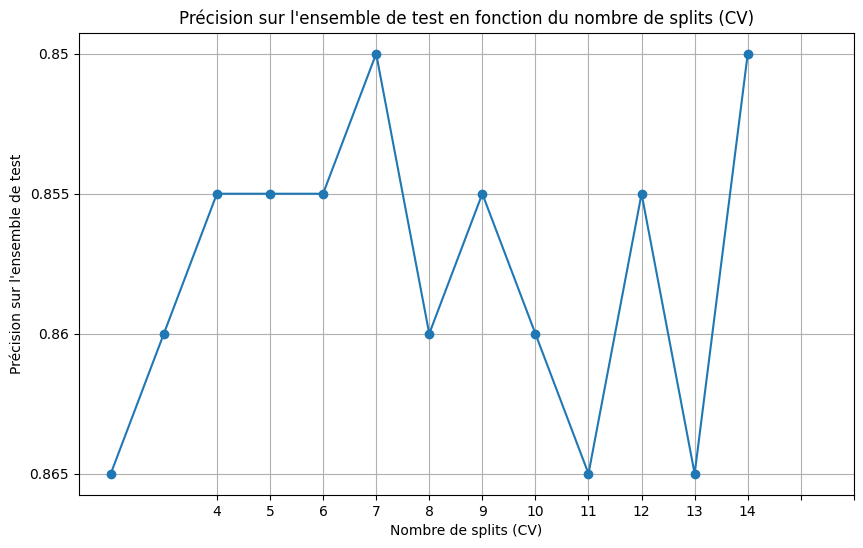

In [114]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Diviser l'ensemble d'entraînement pour avoir une validation interne
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Définir la grille de recherche pour GridSearchCV
param_grid = {
    'n_neighbors': range(1, 51),
    'metric': ['euclidean', 'manhattan', 'chebyshev']
    # Certaines métriques comme 'hamming', 'jaccard' ou 'mahalanobis'
    # peuvent ne pas fonctionner selon le jeu de données.
}

# Liste pour enregistrer les résultats
best_results = []

# Boucle pour tester différents nombres de splits (CV)
for cv in range(2, 15):
    print(f"En cours d'évaluation : CV={cv}")

    # Créer le modèle KNN
    knn = KNeighborsClassifier()

    # Configurer GridSearchCV
    grid_search = GridSearchCV(
        knn, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
    grid_search.fit(X_train_final, y_train_final)

    # Obtenir les meilleurs paramètres
    best_params = grid_search.best_params_
    best_k = best_params['n_neighbors']
    best_metric = best_params['metric']

    # Entraîner le modèle avec les meilleurs paramètres trouvés
    knn_best_model = KNeighborsClassifier(
        n_neighbors=best_k, metric=best_metric)
    knn_best_model.fit(X_train_final, y_train_final)

    # Calculer la précision sur l'ensemble de test
    test_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))

    # Enregistrer les résultats
    best_results.append((cv, best_k, best_metric, test_accuracy))

    print(
        f"CV={cv}: Meilleur k={best_k}, Meilleure métrique={best_metric}, "
        f"Précision sur test={test_accuracy:.2f}"
    )

# Convertir les résultats en tableau numpy pour faciliter l'analyse
best_results_array = np.array(best_results)

# Trouver le CV avec la meilleure précision
best_cv_result = max(best_results, key=lambda x: x[3])
best_cv, best_k, best_metric, best_accuracy = best_cv_result

# Afficher le meilleur résultat global
print("\n--- Résultats globaux ---")
print(f"Meilleure précision: {best_accuracy:.2f}")
print(f"Nombre de splits (CV): {best_cv}")
print(f"Meilleur k: {best_k}")
print(f"Meilleure métrique: {best_metric}")

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(best_results_array[:, 0], best_results_array[:, 3], marker='o', linestyle='-')
plt.title("Précision sur l'ensemble de test en fonction du nombre de splits (CV)")
plt.xlabel("Nombre de splits (CV)")
plt.ylabel("Précision sur l'ensemble de test")
plt.xticks(np.arange(2, 15, step=1))
plt.grid(True)
plt.show()


**Use the grid search with custom split values**

In [115]:
# Configurer GridSearchCV avec différents CV
param_grid = {
    'n_neighbors': range(1, 51),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}
cv_values = range(2, 15)
best_results = []

for cv in cv_values:
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)
    best_results.append((cv, grid_search.best_score_))

# Identifier le meilleur CV
best_cv, best_accuracy = max(best_results, key=lambda x: x[1])
print(f"Meilleur CV: {best_cv}, Précision moyenne: {best_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/di

Meilleur CV: 5, Précision moyenne: 0.88


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**display the best cv, k based on the grid search**

In [116]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Définir la grille de recherche
param_grid = {
    'n_neighbors': range(1, 51),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

cv_values = range(2, 15)
best_results = []

# Boucle pour tester différents CV
for cv in cv_values:
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Enregistrer la meilleure précision moyenne
    best_results.append((cv, grid_search.best_score_))

# Identifier le meilleur CV
best_cv, best_cv_accuracy = max(best_results, key=lambda x: x[1])

# Reformer le modèle avec les meilleurs hyperparamètres
best_model_params = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=best_cv, n_jobs=-1)
best_model_params.fit(X_train, y_train)
final_model = KNeighborsClassifier(**best_model_params.best_params_)
final_model.fit(X_train, y_train)

# Évaluer le modèle final sur X_test
final_test_accuracy = accuracy_score(y_test, final_model.predict(X_test))

# Afficher les résultats
print(f"Meilleur CV: {best_cv}")
print(f"Précision moyenne avec CV: {best_cv_accuracy:.2f}")
print(f"Précision sur l'ensemble de test: {final_test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleur CV: 5
Précision moyenne avec CV: 0.88
Précision sur l'ensemble de test: 0.86


**display the precision graph based on the learning curve**

[ 51 102 153 204 256 307 358 409 460 512]


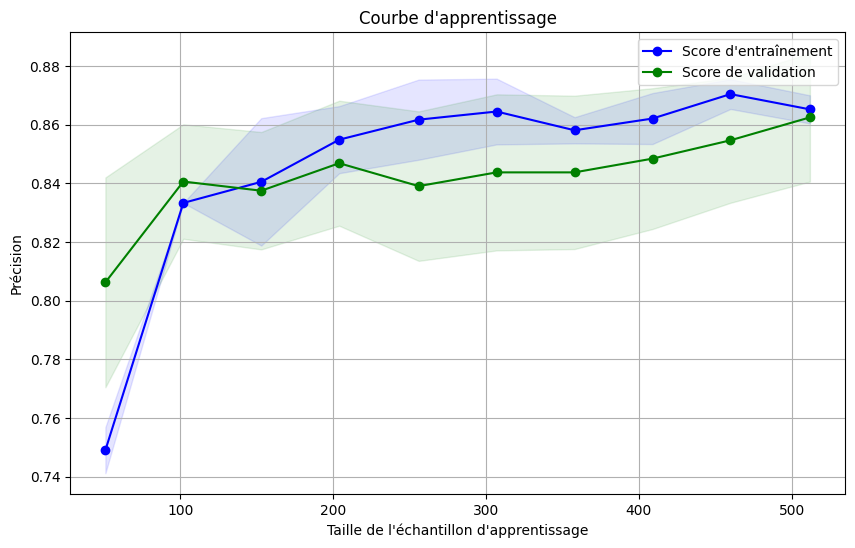

In [117]:
# Calculate learning curve
N, train_scores, val_scores = learning_curve(
    knn_best_model, X_train_final, y_train_final, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)
print(N)
# Compute mean and std for training and validation scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(N, train_scores_mean, 'o-', color='blue', label='Score d\'entraînement')
plt.plot(N, val_scores_mean, 'o-', color='green', label='Score de validation')
plt.fill_between(N, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(N, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color='green', alpha=0.1)
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'échantillon d'apprentissage")
plt.ylabel("Précision")
plt.legend(loc='best')
plt.grid(True)
plt.show()